# Case Study on Network Intrusion Detection

# Context:
The dataset to be audited was provided which consists of a wide variety of intrusions simulated in a military network environment
It created an environment to acquire raw TCP/IP dump data for a network by simulating a typical US Air Force LAN. The LAN was
focused like a real environment and blasted with multiple attacks. A connection is a sequence of TCP packets starting and ending
at some time duration between which data flows to and from a source IP address to a target IP address under some well-defined
protocol. Also, each connection is labelled as either normal or as an attack with exactly one specific attack type. Each
connection record consists of about 100 bytes.
For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and
38 quantitative features) .The class variable has two categories:
•	Normal
•	Anomalous

# Dataset:

https://www.kaggle.com/what0919/intrusion-detection
    
Data basically represents the packet data for a time duration of 2 seconds.
1-9 Columns: basic features of packet (type 1)

10-22 columns: employ the content features (type 2)

23-31 columns: employ the traffic features with 2 seconds of time window (type 4)

32-41 columns: employ the host based features

Feature name	Variable type	Type	 Description

Duration	       C	         1	     No. of seconds of the connection

Protocol_type	   D	         1	     Type of protocol

                                         E.g.: TCP,UDP ,ICMP
                                         
Service	           D	         1	     Network service on the destination E.g.: http, telnet

Flag	           D	         1	     Normal or error status of the connection

src_bytes	       C	         1	     Number of data bytes from source to destination

dst_bytes	       C	         1	     Number of data bytes from destination to source

Land	           D	         1	     1-connection is from the same host/port:
                                         0-otherwise
                                         
Wrong_fragment	   C	         1	     No. of ‘wrong’ fragments

Urgent	           C	         1	     No of urgent fragments

Hot	               C	         2	     The count of access to system directories, creation and execution of programs

Num_failed_logins  C	         2	     No. of failed login attempts

Logged_in	       D	         2	     1-successfully logged in
                                         0-otherwise
                                         
num_compromised	   C	         2	     No. of compromised conditions

Root_shell	       C	         2	     1-root shell is obtained;0 otherwise

Su_attempted	   C	         2	     1-‘su root’ command attempted;0 otherwise

Num_root	       C	         2	     No .of root accesses

num_file_creations C	         2	     Number of file creation operations

Num_shells	       C	         2	     No of shell prompts

Num_access_files   C	         2	     No. of write ,delete and create operations on access control files

Num_outbound_cmds  C	         2	     No. of outbound commands in an ftp session

Is_hot_login	   D	         2	     1-the login belongs to the ‘hot’ list
                                         0: otherwise
                                         
Count	           C	         3	     No. of connections to the same host as the current connection in the past seconds

Srv_count	       C	         3	     No of connections to the same host as the current connection in the past 2 seconds

serror_rate	       C	         3	     % of connections that have ‘SYN’ errors to the same host

Srv_serror_rate	   C	         3	     % of connections that have ‘SYN’ errors to the same service

Rerror_rate	       C	         3	     % of connections that have ‘REJ’ errors to the same host

Srv_diff_host_rate C	         3	     % of connections to different services and to the same host

Dst_host_count	   C	         3	     No of connections to the same host to the destination host as the current connection in                                          the past 2 seconds

Dst_host_srv_count C	         3	     No of connections from the same service to the destination host as the current                                                  connection in the past 2 seconds

dst_host_srv_count C	         3	     No. of connections from the same service to the destination host as the current                                                  connection in the past 2 seconds

Dst_host_srv_count C	         3	     No. of connections from the same service to the destination host as the current                                                  connection in the past 2 seconds

Dst_host_same_srv_rate	C	     3	     % of connections from the same service to the destination host

Dst_host_diff_srv_rate	C	     3	     % of connections from the different services to the destination host

Dst_host_same_src_port_rate	C	 3	     % of connections from the port services to the destination host

Dst_host_srv_diff_host_rate	C	 3	     % of connections from the different hosts from the same service to destination host

Dst_host_serror_rate	C	     3	     % of connections that have ‘SYN” errors to same host to the destination host

dst_host_srv_serror_rate	C	 3	     % of connections that have ‘SYN’ errors from the same service to the destination host

Dst_host_rerror_rate	C	     3	     % of connections that have ‘REJ’ errors from the same host to destination host

Dst_host_srv_rerror_rate	C	 3	     % of connections that have ‘REJ’  errors from the same service to the destination host


# Objective:
    
To detect Network Intrusion using KNN

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data file
data = pd.read_csv('/kaggle/input/intrusion-detection/Train_data.csv')

In [2]:
data.shape

(125973, 42)

In [3]:
data.dtypes

duration                         int64
protocol_type                   object
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
service,125973.0,32.086288,1.646257e+01,1.0,20.00,25.00,50.00,7.000000e+01
flag,125973.0,2.575179,1.141552e+00,1.0,2.00,2.00,4.00,1.100000e+01
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00


In [5]:
#Check for null values
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [6]:
data["xAttack"].value_counts(normalize=True)

xAttack
normal    0.534583
dos       0.364578
probe     0.092528
r2l       0.007899
u2r       0.000413
Name: proportion, dtype: float64

### **The classes of the Y variable are unbalanced**

<Axes: xlabel='xAttack'>

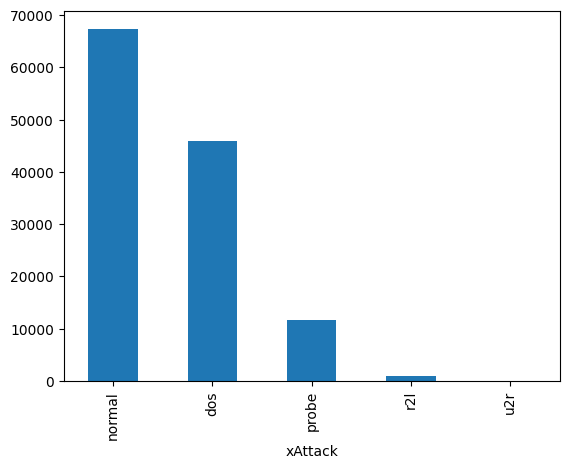

In [7]:
pd.value_counts(data["xAttack"]).plot(kind="bar")

In [8]:
#Use label encoder to convert categorical variables to one-hot encoding (dummy variables)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['xAttack'] = le.fit_transform(data['xAttack'])
data['protocol_type'] = le.fit_transform(data['protocol_type'])
data['service'] = le.fit_transform(data['service'])
data['flag'] = le.fit_transform(data['flag'])

In [9]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'xAttack'],
      dtype='object')

In [10]:
#standardization of data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Outlier: very high or very low values, 
#new_data = dataset.drop(['class', 'protocol_type', 'service', 'flag'],axis = 1)


In [11]:
X_std = pd.DataFrame(StandardScaler().fit_transform(data))
X_std.columns = data.columns

In [12]:
#split the dataset into training and test datasets
import numpy as np
from sklearn.model_selection import train_test_split

# Transform data into features and target
X = np.array(data.iloc[:, 1:5])
y = np.array(data['xAttack'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [13]:
print(X_train.shape)
print(y_train.shape)

(100778, 4)
(100778,)


In [14]:
print(X_test.shape)
print(y_test.shape)

(25195, 4)
(25195,)


### Build the model and train and test on training and test sets respectively using scikit-learn. Print the Accuracy of the model
### with different values of k=3,5,9.

In [15]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [17]:

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
#print(recall_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.9715022821988489


In [18]:
# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.9735661837666204


In [19]:
# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.9726533042270292


### #Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Mis
#### classification error

In [20]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [21]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 5


### Plot misclassification error vs k (with k value on X-axis) using matplotlib.

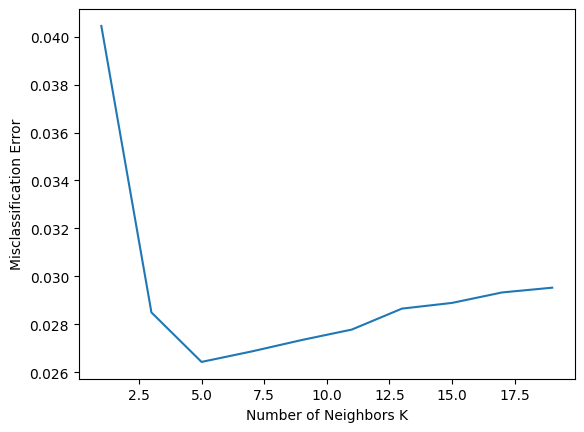

In [22]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [23]:
#Use k=5 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average=None))

0.9735661837666204
[0.99186463 0.99089833 0.80346821 0.90243902 0.25      ]


**The final model has a good accuracy as well as recall score**